# Understanding market trends to help grow an e-learning company

This project will utilize data gathered by e-learning platforms to provide a recommendation for an e-learning company on which markets to advertise their product to. The goal of the project is to understand the user base and how much they are willing to spend on e-learning, and recommend the two best markets with potential.

In [2]:
# Read in the data
import pandas as pd
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(direct_link, low_memory=0)

# Quick exploration of the data
survey.shape
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will use a ready-made data set from freeCodeCamp's 2017 New Coder Survey, a free e-learning platform since they have data from a large sample with relevant data that we can use for our analysis. We are using this dataset because they gathered data about the global market and the survey attracted new coders with varying interests, which is ideal for the purpose of our analysis. 

The data set can be downloaded from here:
https://github.com/freeCodeCamp/2017-new-coder-survey

More information on the column names of the raw data can be found here: https://github.com/freeCodeCamp/2017-new-coder-survey

We want to know:
- Where are the new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

To do so, we will first check whether the sample data is representative of our population of interest and has the right categories of people for our purpose.

In [3]:
survey['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The majority of people are interested in more than one subjects (~81%). However, from a quick glance, there seems to be interest in mobile and web development as many of the people who listed multiple subjects have listed one of the subjects. The data is a little too granular for analysis but we can split the string and count how many subjects were listed and find the number of people who listed web or mobile development. 

In [5]:
# Split each string in the 'JobRoleInterest' column
interests_no_null = survey['JobRoleInterest'].dropna()
splitted_interests = interests_no_null.str.split(',')

# Frequency table for the var describing number of interests
number_of_interest = splitted_interests.apply(lambda x: len(x)) # x is the list of job options
number_of_interest.value_counts(normalize=True).sort_index()*100


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

70% of people are interested in more than one subject while only 31% of students have a clear interest. However, since the courses that our e-learning company offers varies so the fact that the people have varied interest may work for us. To determine whether people are interested in either web and mobile development, we can look for the percentage of people where their interests are in web and mobile development.

In [6]:
# Frequency table for web or mobile development in 'JobRoleInterest' Column
web_or_mobile = interests_no_null.str.contains('Web Developer|Mobile Developer') # returns string of booleans
freq_web_mobile = web_or_mobile.value_counts(normalize=True)*100
print(freq_web_mobile)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


([<matplotlib.axis.XTick at 0x7ff9da2ec358>,
 <a list of 2 Text xticklabel objects>)

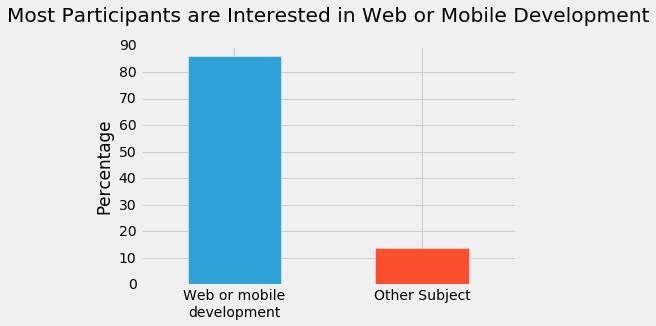

In [10]:
# Graph for the frequency table above
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

freq_web_mobile.plot.bar()
plt.title('Most Participants are Interested in Web or Mobile Development', y= 1.08)
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other Subject'], rotation=0)

It turns out that more than 86% of participants in this survey are interested in either web or mobile development. These figures offer us strong reason to consider this sample as representative for our analysis. Since we want to advertise the e-learning courses to all niches along our web/mobile development base, having some diversity in interest may help as well.

Now we would like to know 
1. Where are these new coders are located?
2. What area has the most new coders?
3. How much money are new coders willing to spend on e-learning?

## New Coders and Locations

To start, we will look at where these new coders are located and at what density. This should be a good start for finding the two best markets for our ad campaign.

In [19]:
# Drop all the rows where participants didn't answer what role they are interested in
survey_good = survey[survey['JobRoleInterest'].notnull()].copy()

# Frequency table for where participants live currently
absolute_freq_country = survey_good['CountryLive'].value_counts()
relative_freq_country = survey_good['CountryLive'].value_counts(normalize=True)*100

# Display the tables in a more readable format
pd.DataFrame(data = {'Absolute Frequency': absolute_freq_country, 'Relative Frequency': relative_freq_country}
            )

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


46% of our potential customers are located in United States. These definitely seems to be the biggest and most interesting market. However, the second market is not as clear cut. India has the second highest customer density (7.7%), but Canada (3.8%) and U.K. (4.6%) are not far behind.

We will need to dive further to understand which market is more willing to spend on e-learning to make a decision on our ad campaign markets.

## Money Spent on E-Learning

Our company sells subscriptions at a price of $59/month. The 'MoneyForLearning' column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. We will need to convert this column into an amount per month to have a comparable value.

It is also a good idea to narrow down our analysis to only the four countries of interest: US, India, U.K. and Canada. These are the countries with the highest absolute frequencies in our sample. The other consideration is that the courses are written in English, and English is an official language in all these four countries. This gives us a better change at targeting the right people with our ads.

In [24]:
# Divide the amount of money a student has spent by the amount of time the student has been learning
survey_good['MoneyPerMonth']=survey_good['MoneyForLearning']/survey_good['MonthsProgramming']
survey_good['MoneyPerMonth'].head()

# Since some students answered they had been learning to code for 0 months (just started), to avoid dividing by 0, we will replace all values of 0 with 1
survey_good['MonthsProgramming'].replace(0,1,inplace=True)

# Divide the amount of money a student has spent by the amount of time the student has been learning
survey_good['MoneyPerMonth']=survey_good['MoneyForLearning']/survey_good['MonthsProgramming']
survey_good['MoneyPerMonth'].head()

# Count the number of students who did not spend any money
survey_good['MoneyPerMonth'].isnull().sum()

675

We'll only keep the students that don't have a null value for amount of money spent per month (our new column).

We'll also remove any rows that have null values in the CountryLive column since that will not be helpful in our analysis.

In [25]:
# Remove the rows with students who did not spend any money per month
survey_good = survey_good[survey_good['MoneyPerMonth'].notnull()]

# Remove the rows with students who have null values in 'CountryLive' column
survey_good = survey_good[survey_good['CountryLive'].notnull()]

# Frequency table to check if we have enough data
survey_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough data still for our analysis, so we will group the students by country to get the average amount of money spent per month by country.

In [29]:
country_mean = survey_good.groupby('CountryLive').mean()
country_mean['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

The average amount spent per month for UK seems very low, especially compared to India and Canada. Considering the GDP for each country, it seems unlikely that India would spend more on e-learning than UK and Canada. There could be outliers affecting the mean for some countries or we don't have enough representative data. Or, the average could be representative and our results are correct. We will dig into the results further to explore the distribution within each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


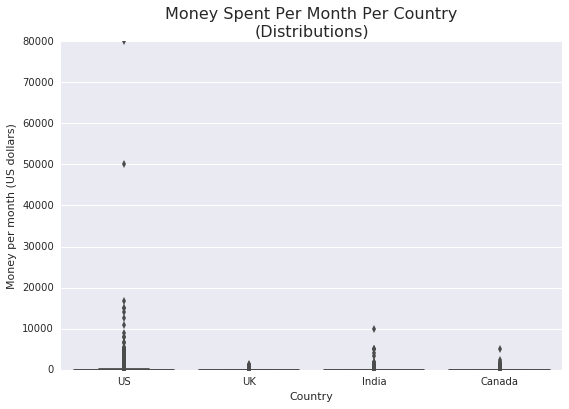

In [34]:
# Generate box plots to visualize the distribution of the variable 'MoneyPerMonth' for each country
survey_good['MoneyPerMonth'].plot.box()

# Isolate the 4 countries of interest
only_4 = survey_good[survey_good['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')]

# Boxplots using seaborn to visualize distribution
import seaborn as sns
sns.boxplot(data = only_4, x= 'CountryLive', y='MoneyPerMonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There seems to be two extreme outliers in US. It is hard to determiner if there are outliers in UK, India, and Canada since the y-axis has been pulled out of scale. We will first eliminate the outlier in US and then look at the new axis.

In [37]:
# Isolate only those participants who spend less than 20000 per month
fcc_good = survey_good[survey_good['MoneyPerMonth'] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


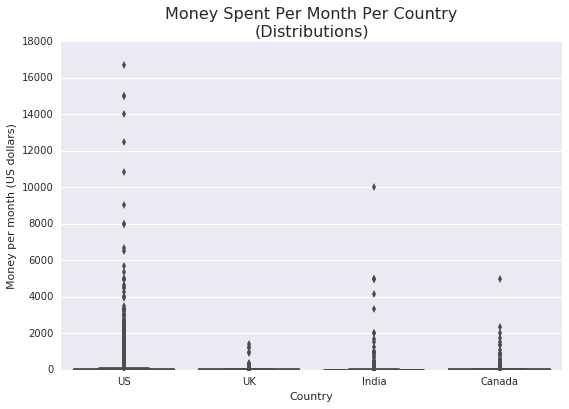

In [38]:
# Isolate the 4 countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')]

# Visualize distribution without the outliers in U.S.
sns.boxplot(data = only_4, x= 'CountryLive', y='MoneyPerMonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [40]:
no_outliers_avg_moneypermonth_country = fcc_good.groupby('CountryLive').mean()
no_outliers_avg_moneypermonth_country['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

The mean values are in a closer range. However, let's look into the respondents who responded with spending more than $5000 per month in India to figure out whether these big expenses with learning are justified.

In [45]:
india_high = only_4[(only_4['MoneyPerMonth']>2500) & (only_4['CountryLive']=='India')]
india_high

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None of these respondents attended a bootcamp. However, it is hard to determine whether they did spend over $2500 if they hadn't attended a bootcamp. Perhaps they included the money spent on tuition, though the question had asked to exclude tuition costs. It seems safer to remove these respondents as outliers.

In [46]:
only_4 = only_4.drop(india_high.index) # drop outliers using labels

In [47]:
no_outliers_avg_moneypermonth_country = only_4.groupby('CountryLive').mean()
no_outliers_avg_moneypermonth_country['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                        65.758763
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

In [48]:
# Examine extreme values in the U.S.
us_high = only_4[(only_4['MoneyPerMonth']>6000) & (only_4['CountryLive']=='United States of America')]
us_high

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove these eight outliers.

In the next code block, we'll remove respondents that:

1. Didn't attend bootcamps.
2. Had been programming for three months or less when at the time they completed the survey

In [52]:
# Remove rows where students in US with high spending did not attend bootcamp
no_bootcamp = only_4[
    (only_4['AttendedBootcamp']==0) &
    (only_4['CountryLive']=='United States of America') &
    (only_4['MoneyPerMonth']>= 6000)]
only_4 = only_4.drop(no_bootcamp.index) # drop outliers using labels

# Remove rows where students in US with high spending programmed for less than 3 months
less_than_3months = only_4[
    (only_4['CountryLive']=='United States of America') &
    (only_4['MoneyPerMonth']>= 6000) &
    (only_4['MonthsProgramming']<=3)]
only_4 = only_4.drop(less_than_3months.index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


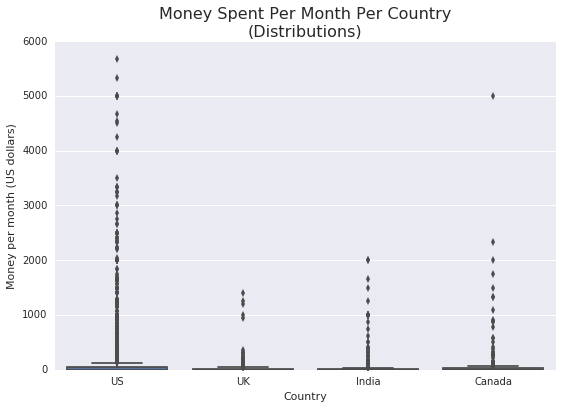

In [54]:
# Visualize distribution without the outliers in U.S.
sns.boxplot(data = only_4, x= 'CountryLive', y='MoneyPerMonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [56]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['MoneyPerMonth'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This respondent has only been programming for two months. His situation is probably similar to the cases in US where they paid a lump sum for a bootcamp and haven't paid since. We will remove this case as an outlier as well.

In [57]:
# Remove rows where students in Canada with high spending programmed for less than 3 months
less_than_3months = only_4[
    (only_4['CountryLive']=='Canada') &
    (only_4['MoneyPerMonth']>= 4500) &
    (only_4['MonthsProgramming']<=3)]
only_4 = only_4.drop(less_than_3months.index)

In [58]:
# Recompute average spending for each country
no_outliers_avg_moneypermonth_country = only_4.groupby('CountryLive').mean()
no_outliers_avg_moneypermonth_country['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


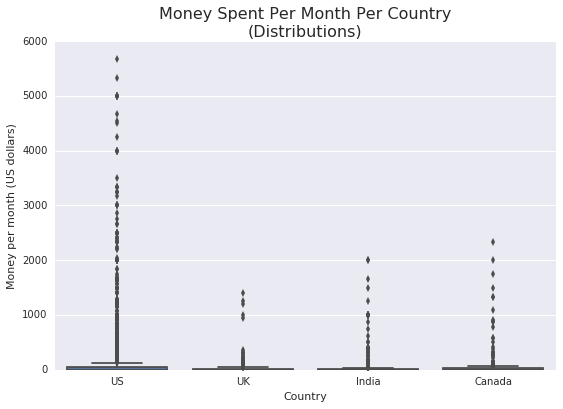

In [59]:
# Visualize distribution without the outliers in U.S.
sns.boxplot(data = only_4, x= 'CountryLive', y='MoneyPerMonth')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

After removing outliers and understanding the respondent demographic better, it looks like U.S. is still a solid choice because there are a lot of new potential students willing to pay a lot of money for learning ($143 on average). The second best choice may be Canada as they are willing to spend $93/mo on average. India has more students than Canada so we shouldn't discount them. As students in India are willing to spend $65/mo on average, it isn't a far stretch for our subscriptions that sell at a price of $59 per month.

In [60]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
   - 60% for the US, 25% for India, 15% for Canada.
   - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Summary & Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in for our e-learning courses. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.